# Diabetes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfDiabetes = pd.read_csv('diabetes.csv')
dfDiabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
PatientID                 15000 non-null int64
Pregnancies               15000 non-null int64
PlasmaGlucose             15000 non-null int64
DiastolicBloodPressure    15000 non-null int64
TricepsThickness          15000 non-null int64
SerumInsulin              15000 non-null int64
BMI                       15000 non-null float64
DiabetesPedigree          15000 non-null float64
Age                       15000 non-null int64
Diabetic                  15000 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [4]:
dfDiabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [5]:
dfDiabetes['Diabetic'].value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

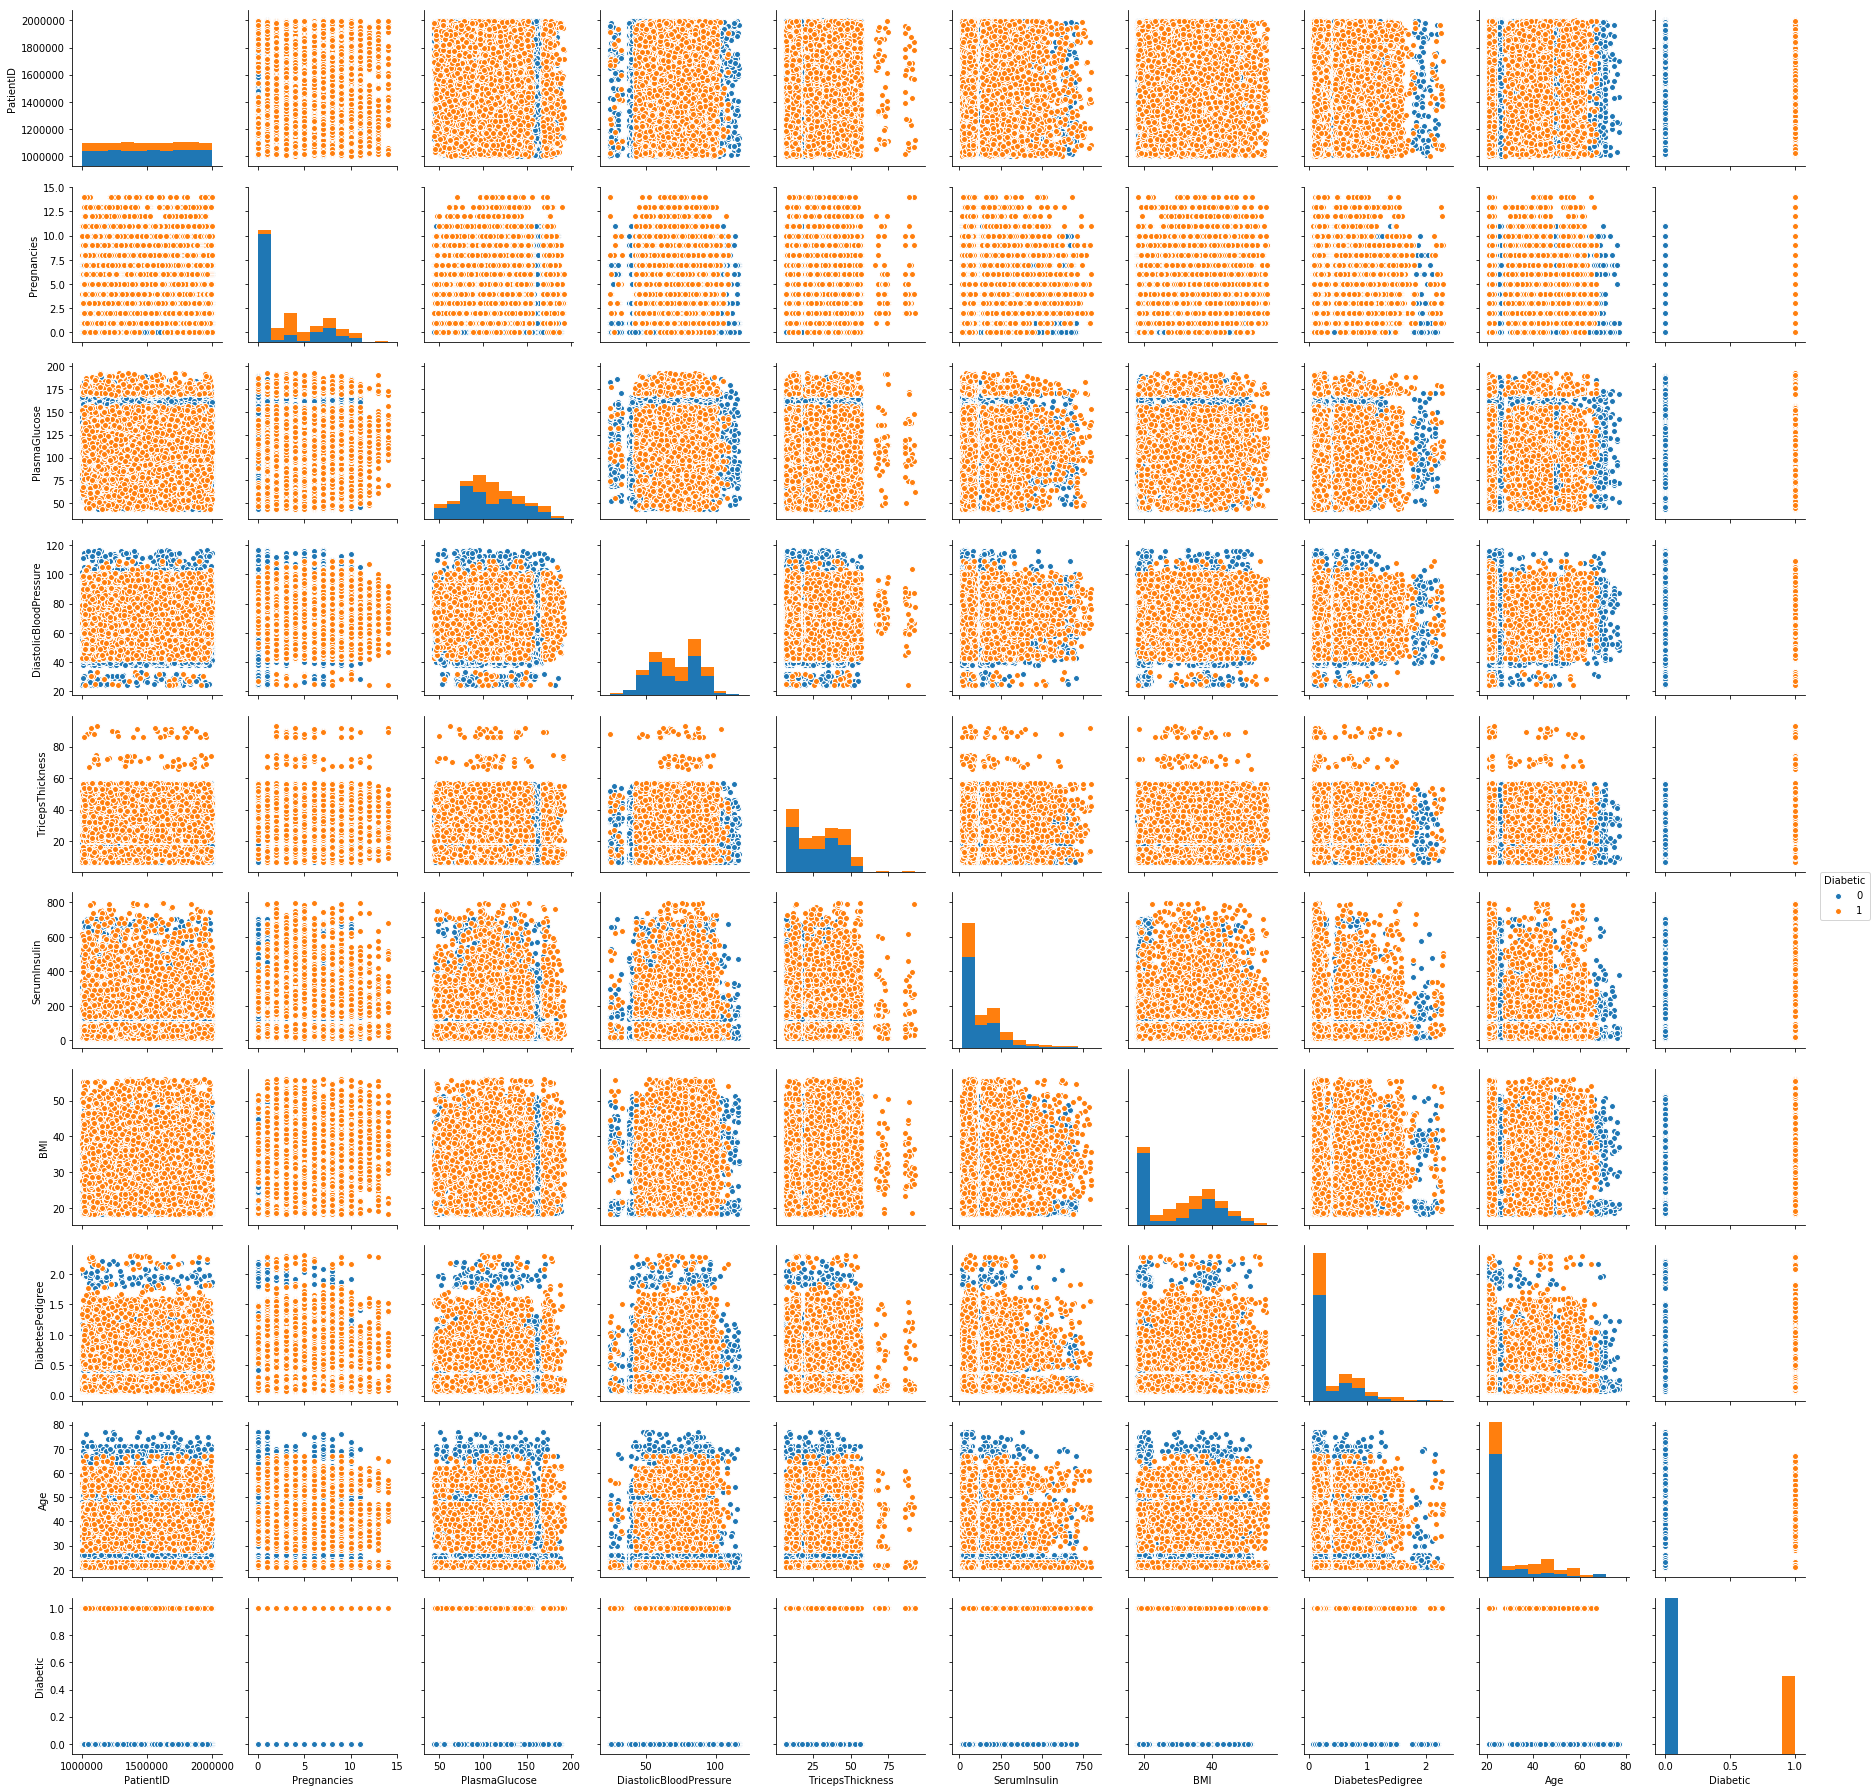

In [6]:
sns.pairplot(dfDiabetes, hue='Diabetic')

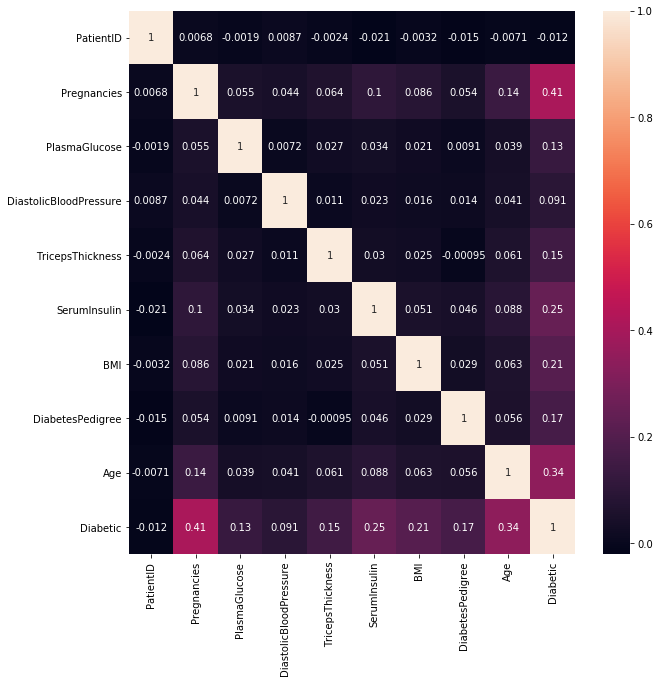

In [7]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dfDiabetes.corr(),annot=True)

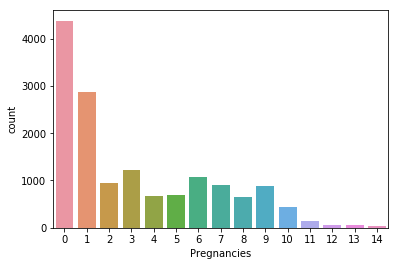

In [8]:
sns.countplot(dfDiabetes['Pregnancies'])

In [9]:
data = dfDiabetes.drop(['Diabetic','PatientID'], axis=1)
target = dfDiabetes['Diabetic']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,
                                                    test_size=0.30, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=100)

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, confusion_matrix, accuracy_score, roc_curve, auc

In [14]:
predict = rfc.predict(X_test)
predictProb = rfc.predict_proba(X_test)

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))

[[2903  119]
 [ 151 1327]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3022
           1       0.92      0.90      0.91      1478

   micro avg       0.94      0.94      0.94      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.94      0.94      0.94      4500

ROC AUC : 0.9843795477280278
Accuracy : 0.94
Matthews Corr_coef : 0.8633449219052529


In [15]:
predictCustom = []
for prob in predictProb[:,1] :
    if(prob > 0.2) :
        predictCustom.append(1)
    else :
        predictCustom.append(0)

print(confusion_matrix(y_test, predictCustom))
print(classification_report(y_test, predictCustom))
print('Accuracy :',accuracy_score(y_test, predictCustom))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predictCustom))

[[2648  374]
 [  38 1440]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3022
           1       0.79      0.97      0.87      1478

   micro avg       0.91      0.91      0.91      4500
   macro avg       0.89      0.93      0.90      4500
weighted avg       0.92      0.91      0.91      4500

Accuracy : 0.9084444444444445
Matthews Corr_coef : 0.8143342171463127


In [16]:
predictProb

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.95, 0.05],
       [0.99, 0.01]])

In [17]:
predictProb[:,0].sum()

3022.52

In [18]:
predictProb[:,1].sum()

1477.48

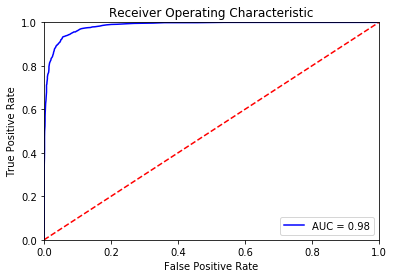

In [19]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

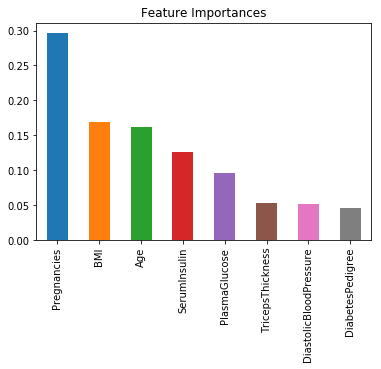

In [20]:
coef1 = pd.Series(rfc.feature_importances_, data.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')

# Deploy

In [21]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(data,target)
import pickle
filename = 'rfc_diabetes.sav';
pickle.dump(rfc, open(filename, 'wb'))